In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re



ImportError: cannot import name 'HandlerRect' from 'matplotlib.legend_handler' (c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\legend_handler.py)

In [9]:
df = pd.read_csv(r'../../data/derived/Pleiades_df.csv')
roman_df = df[df['Title'].str.lower().str.contains('roman ')]
roman_df = roman_df[roman_df['Start_Date']<500.0] ### No roman places are created after 500 AD
roman_settlements = roman_df[roman_df['Place_Type'].str.lower().str.contains('settlement')]

Roman empire spans from around 30 BC to 480 AD with its height around 117 AD where it controlled all land from western europe to the middle east, one idea is to show how the 'tagged Roman' structures correlate with this information. Below I will try to plot the number of tagged places from 30 bc to 480AD

In [10]:
dates = np.arange(-100,480, 10)
no_roman_places = np.zeros_like(dates)
for i, date in enumerate(dates):
    no_roman_places[i] = len(roman_df[(roman_df['Start_Date']<=date) & (roman_df['End_Date']>=date)])


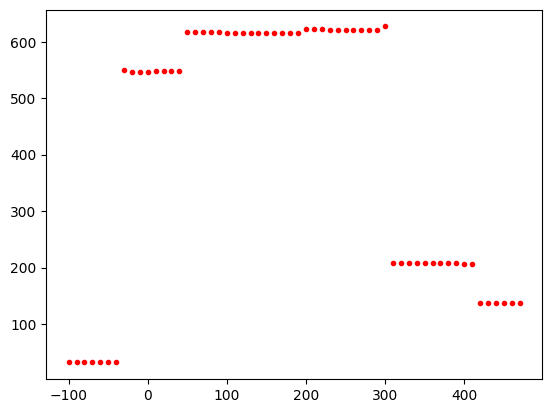

In [11]:
plt.plot(dates, no_roman_places, 'r.')

In [46]:
lons_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['long']
lats_117AD = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=117)]['lat']
lons_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['long']
lats_480AD = roman_df[(roman_df['Start_Date']<=480) & (roman_df['End_Date']>=480)]['lat']
lons_both = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=480)]['long']
lat_both = roman_df[(roman_df['Start_Date']<=117) & (roman_df['End_Date']>=480)]['lat']

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


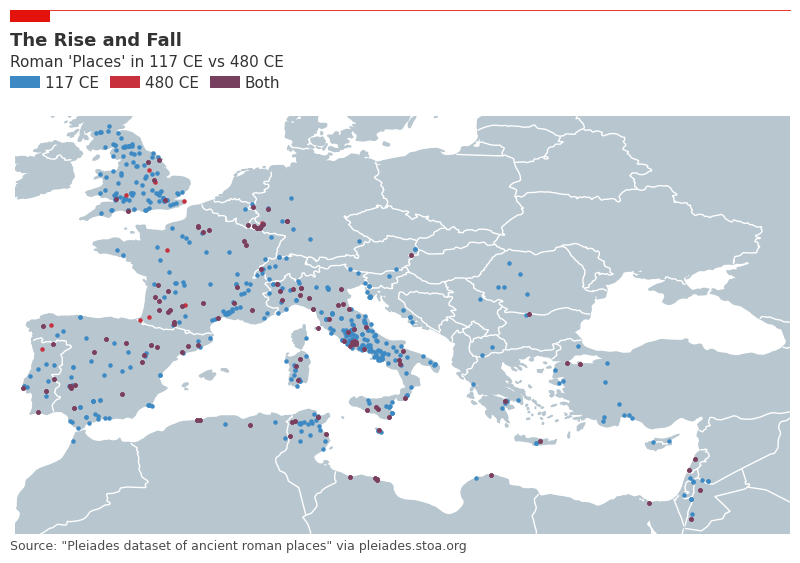

In [157]:
#### THINGS TO DO
## ADD MAJOR CITY NAMES

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree()) ## CAN change type of projection

### This plots the map plot


ax.add_feature(cfeature.LAND, color = '#B7C6CF', zorder = 1)
ax.add_feature(cfeature.BORDERS, color = 'white', zorder = 2)


ax.scatter(lons_117AD, lats_117AD, s=5 , c ='#3D89C3' ,transform=ccrs.PlateCarree(), zorder = 3)
ax.scatter(lons_480AD, lats_480AD, s=5,c ='#C7303C' ,transform=ccrs.PlateCarree(), zorder = 4)
ax.scatter(lons_both, lat_both, s=5, c ='#78405F' ,transform=ccrs.PlateCarree(), zorder = 5)
ax.axis('off')
ax.set_extent([-10, 42, 57, 29], crs=ccrs.PlateCarree())


# Add in line and tag
ax.plot([0.12, .9],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,1.02),                # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))



# Add in title and subtitle
ax.text(x=0.12, y=.96, s="The Rise and Fall", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.925, s="Roman \'Places\' in 117 CE vs 480 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=.12, s="""Source: "Pleiades dataset of ancient roman places" via pleiades.stoa.org""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

## ADD legend

ax.add_patch(plt.Rectangle((0.12,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#3D89C3', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
ax.add_patch(plt.Rectangle((0.22,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#C7303C', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
ax.add_patch(plt.Rectangle((0.32,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#78405F', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax.text(x=0.155, y=.89, s="117 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=0.255, y=.89, s="480 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=0.355, y=.89, s="Both", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)


# Show the plot
plt.show()

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


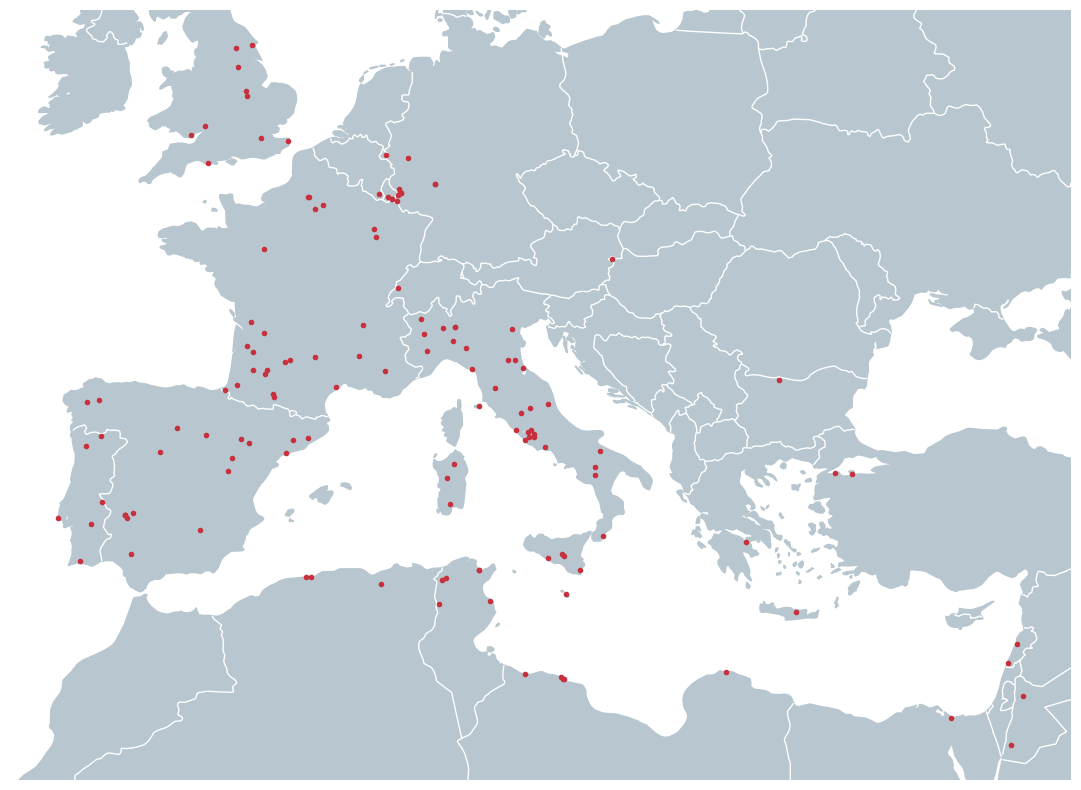

In [140]:
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Mercator()) ## CAN change type of projection

# ax.set_extent([-10, 42, 57, 25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = '#B7C6CF')
ax.add_feature(cfeature.BORDERS, color = 'white')

# ax.plot(lons_117AD, lats_117AD, '.',c ='#3D89C3' ,transform=ccrs.PlateCarree(), alpha = 1)
ax.plot(lons_480AD, lats_480AD, '.' ,transform=ccrs.PlateCarree(),c ='#C7303C', alpha = 1)

ax.axis('off')

# Show the plot
plt.show()

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


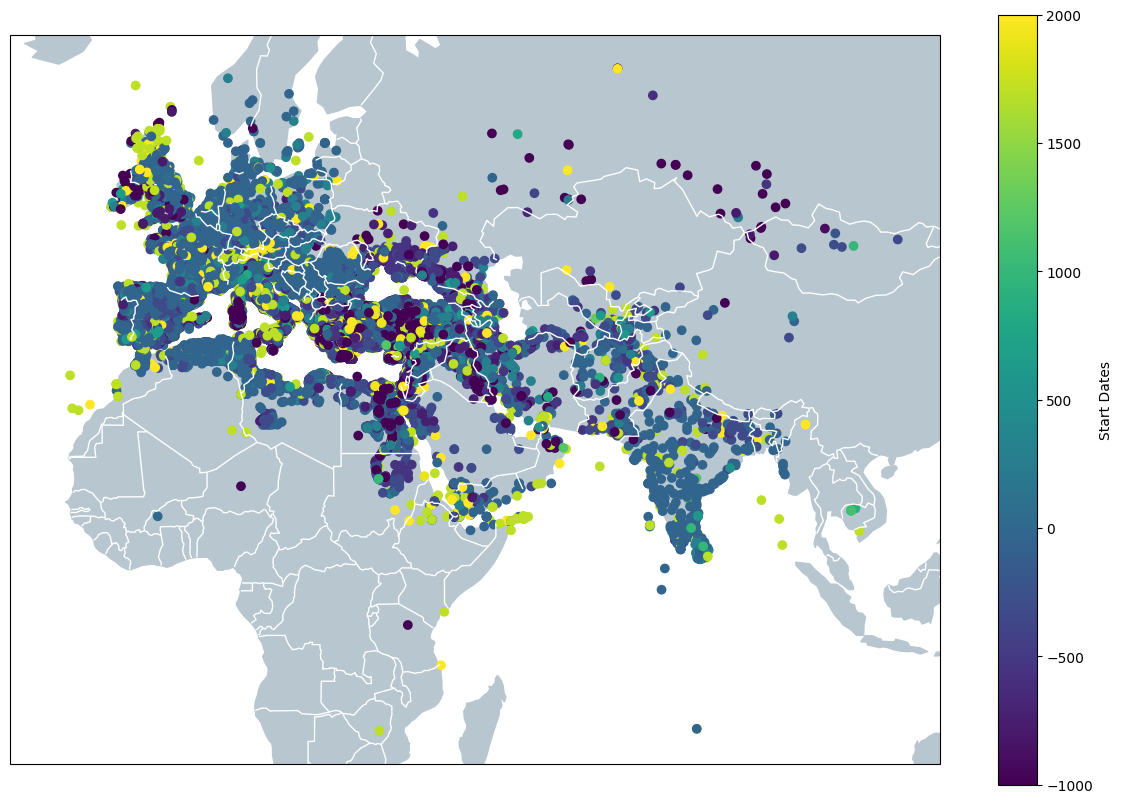

In [127]:
## PLOT EVERYTHING

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.Mercator()) ## CAN change type of projection

# ax.set_extent([-10, 42, 57, 25], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color = '#B7C6CF')
ax.add_feature(cfeature.BORDERS, color = 'white')

start_dates = df['Start_Date']
truncated_start_dates = [max(value, -1000) for value in start_dates]

sc = ax.scatter(df['long'], df['lat'], c=truncated_start_dates, cmap='viridis' ,transform=ccrs.PlateCarree(), alpha = 1)

plt.colorbar(sc, label='Start Dates')
# Show the plot
plt.show()